# TED Talks 合集整理

> For your further exercise, let's analyze a dataset about [TED talks](https://www.ted.com/talks) using `pandas` and `matplotlib` libraries.

### <font color = green> Activation of necessary libraries. </font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data Preparation and Cleaning

In [2]:
df = pd.read_csv('TED_talks.csv')

In [3]:
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [4]:
df.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')

### Features Available

- name: The official name of the TED Talk. Includes the title and the speaker.

- title: The title of the talk

- description: A blurb of what the talk is about.

- main_speaker: The first named speaker of the talk.

- speaker_occupation: The occupation of the main speaker.

- num_speaker: The number of speakers in the talk.

- duration: The duration of the talk in seconds.

- event: The TED/TEDx event where the talk took place.

- film_date: The Unix timestamp of the filming.

- published_date: The Unix timestamp for the publication of the talk on TED.com

- comments: The number of first level comments made on the talk.

- tags: The themes associated with the talk.

- languages: The number of languages in which the talk is available.

- ratings: A stringified dictionary of the various ratings given to the talk (inspiring, fascinating, jaw dropping, etc.)

- related_talks: A list of dictionaries of recommended talks to watch next.

- url: The URL of the talk.

- views: The number of views on the talk.

In [5]:
# len(df) → obtain the total number of rows

# len(df.columns)  → obtain the total of columns

df.shape  # → obtain the total number of rows and columns

(2550, 17)

- We have over 2550 talks at our disposal. These represent all the talks that have ever been posted on the TED Platform until September 21, 2017 and has talks filmed in the period between 1994 and 2017. It has been over two glorious decades of TED.

> Trying to reorder the columns in the order I've listed the features for my convenience.

In [6]:
df = df[['name','title','description', 'main_speaker', 'speaker_occupation', 'num_speaker', 'duration', 'event', 'film_date', 'published_date', 'comments', 'tags', 'languages', 'ratings', 'related_talks', 'url', 'views']]

In [7]:
# Let's look at the data type of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   name                2550 non-null   object
 1   title               2550 non-null   object
 2   description         2550 non-null   object
 3   main_speaker        2550 non-null   object
 4   speaker_occupation  2544 non-null   object
 5   num_speaker         2550 non-null   int64 
 6   duration            2550 non-null   int64 
 7   event               2550 non-null   object
 8   film_date           2550 non-null   int64 
 9   published_date      2550 non-null   int64 
 10  comments            2550 non-null   int64 
 11  tags                2550 non-null   object
 12  languages           2550 non-null   int64 
 13  ratings             2550 non-null   object
 14  related_talks       2550 non-null   object
 15  url                 2550 non-null   object
 16  views               2550

 - We notice that the Dtypes of `"film_date"` and `"published_date"` are both int64.



- Before we go any further, let us convert the Unix timestamps into a human readable format.

In [8]:
import datetime as dt

In [9]:
df['film_date'] = df['film_date'].apply(lambda x: dt.datetime.fromtimestamp(int(x)).strftime('%d-%m-%Y'))

In [10]:
df['published_date'] = df['published_date'].apply(lambda x: dt.datetime.fromtimestamp(int(x)).strftime('%d-%m-%Y'))

In [11]:
# another method to translate these dates into appropriate way

# def convert(x):
#      return pd.to_datetime(x, unit = 's')

#  df['film_date'] = df['film_date'].apply(convert)
#  df['published_date'] = df['published_date'].apply(convert)

In [12]:
df.head()

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,25-02-2006,27-06-2006,4553,"['children', 'creativity', 'culture', 'dance',...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,977,TED2006,25-02-2006,27-06-2006,265,"['alternative energy', 'cars', 'climate change...",43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,David Pogue: Simplicity sells,Simplicity sells,New York Times columnist David Pogue takes aim...,David Pogue,Technology columnist,1,1286,TED2006,24-02-2006,27-06-2006,124,"['computers', 'entertainment', 'interface desi...",26,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,Majora Carter: Greening the ghetto,Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",Majora Carter,Activist for environmental justice,1,1116,TED2006,26-02-2006,27-06-2006,200,"['MacArthur grant', 'activism', 'business', 'c...",35,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,Hans Rosling: The best stats you've ever seen,The best stats you've ever seen,You've never seen data presented like this. Wi...,Hans Rosling,Global health expert; data visionary,1,1190,TED2006,22-02-2006,28-06-2006,593,"['Africa', 'Asia', 'Google', 'demo', 'economic...",48,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/hans_rosling_shows_t...,12005869


## checking the number of missing values  or NULL values

In [13]:
df.isna().sum() # calculate the the number of missing values in each column

name                  0
title                 0
description           0
main_speaker          0
speaker_occupation    6
num_speaker           0
duration              0
event                 0
film_date             0
published_date        0
comments              0
tags                  0
languages             0
ratings               0
related_talks         0
url                   0
views                 0
dtype: int64

- As can be seen there is only null values in speaker occupation and only 6 of them.(can ignore speaker occupation, only 6 are missing)

In [14]:
# Let’s have a look inside the dataset structure

df.dtypes

name                  object
title                 object
description           object
main_speaker          object
speaker_occupation    object
num_speaker            int64
duration               int64
event                 object
film_date             object
published_date        object
comments               int64
tags                  object
languages              int64
ratings               object
related_talks         object
url                   object
views                  int64
dtype: object

## Data Exploratory Analysis and Visualization





##  1. Views

> Most Viewed Talks of All Time

   
   - For starters, let us perform some easy analysis. I want to know what `the 15 most viewed TED talks` of all time are. The number of views gives us a good idea of the popularity of the TED Talk.

In [15]:
#根据views量排序前15行数据

pop_talks_15 = df[['name',
                   'title',
                   'main_speaker',
                   'views',
                   'film_date']].sort_values(by = 'views',
                                             ascending=False)[:15]

pop_talks_15

,name,title,main_speaker,views,film_date
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Ken Robinson,47227110,25-02-2006
1346,Amy Cuddy: Your body language may shape who yo...,Your body language may shape who you are,Amy Cuddy,43155405,26-06-2012
677,Simon Sinek: How great leaders inspire action,How great leaders inspire action,Simon Sinek,34309432,17-09-2009
837,Brené Brown: The power of vulnerability,The power of vulnerability,Brené Brown,31168150,06-06-2010
452,Mary Roach: 10 things you didn't know about or...,10 things you didn't know about orgasm,Mary Roach,22270883,06-02-2009
1776,Julian Treasure: How to speak so that people w...,How to speak so that people want to listen,Julian Treasure,21594632,10-06-2013
201,Jill Bolte Taylor: My stroke of insight,My stroke of insight,Jill Bolte Taylor,21190883,27-02-2008
5,Tony Robbins: Why we do what we do,Why we do what we do,Tony Robbins,20685401,02-02-2006
2114,James Veitch: This is what happens when you re...,This is what happens when you reply to spam email,James Veitch,20475972,08-12-2015
1416,Cameron Russell: Looks aren't everything. Beli...,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,19787465,27-10-2012


#### Observations


- Ken Robinson's talk on **"Do Schools Kill Creativity?"** is the most popular TED Talk of all time with 47.2 million views.


- Also coincidentally, it is also one of the first talks to ever be uploaded on the TED Site (the main dataset is sorted by published date).


- Robinson's talk is closely followed by Amy Cuddy's talk on **"Your Body Language May Shape Who You Are."**


- There are only 2 talks that have surpassed the 40 million mark and 4 talks that have crossed the 30 million mark.

> Let us make a bar chart to visualise above these 15 most viewed talks in terms of the number of views they garnered.

- Due to the length of main speakers' names, we try to abbreviate their names, just take the first three letters of their names.

In [16]:
# 切分“main_speaker”的前三个字母，新增一列"abbr" → store their name abbreviation

pop_talks_15['abbr'] = pop_talks_15['main_speaker'].apply(lambda x: x[:3])

pop_talks_15.head()

,name,title,main_speaker,views,film_date,abbr
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Ken Robinson,47227110,25-02-2006,Ken
1346,Amy Cuddy: Your body language may shape who yo...,Your body language may shape who you are,Amy Cuddy,43155405,26-06-2012,Amy
677,Simon Sinek: How great leaders inspire action,How great leaders inspire action,Simon Sinek,34309432,17-09-2009,Sim
837,Brené Brown: The power of vulnerability,The power of vulnerability,Brené Brown,31168150,06-06-2010,Bre
452,Mary Roach: 10 things you didn't know about or...,10 things you didn't know about orgasm,Mary Roach,22270883,06-02-2009,Mar


Text(0, 0.5, 'Views')

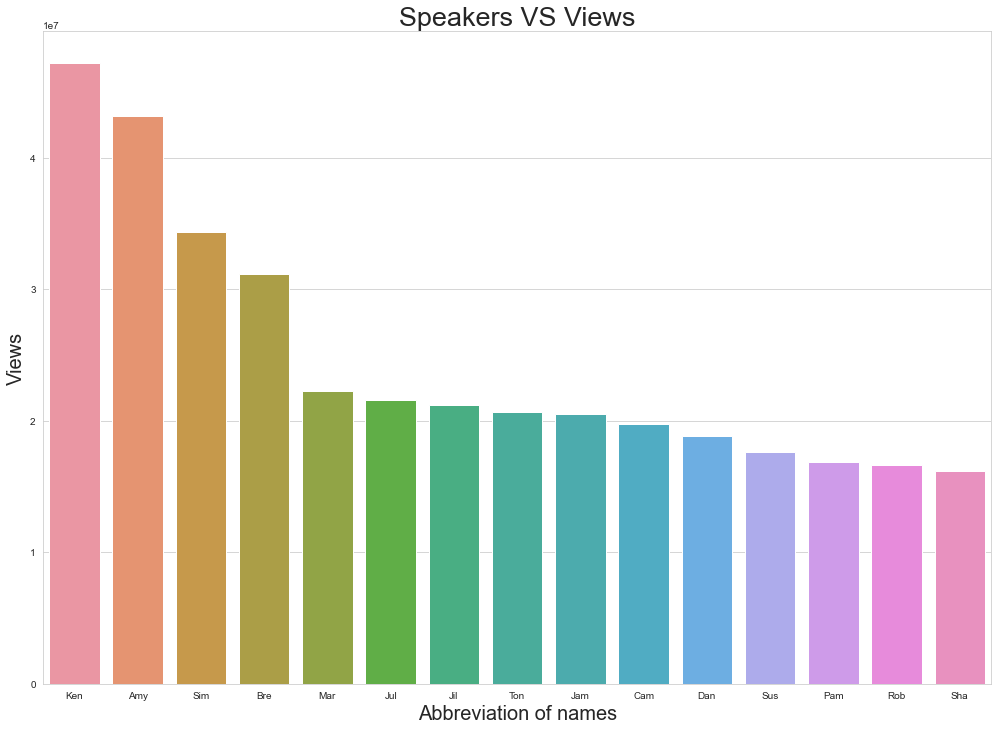

In [17]:
sns.set_style('whitegrid')
plt.figure(figsize=(17,12))

sns.barplot(x=pop_talks_15.abbr,
            y=pop_talks_15.views)

plt.title('Speakers VS Views', fontsize=27)
plt.xlabel('Abbreviation of names', fontsize=20)
plt.ylabel('Views', fontsize=20)

Text(0, 0.5, 'Title')

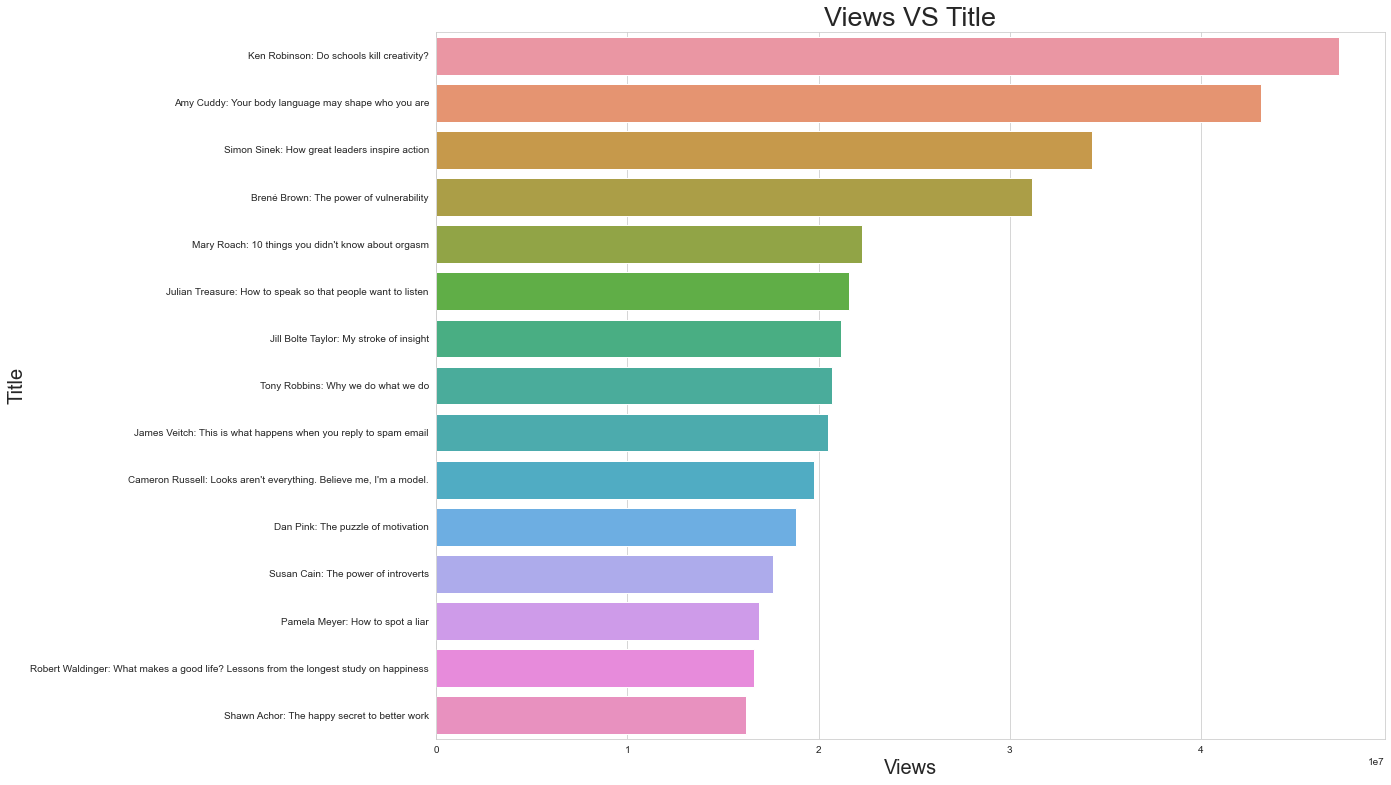

In [18]:
sns.set_style('whitegrid')
plt.figure(figsize=(17,13))

sns.barplot(x = pop_talks_15.views,
            y = pop_talks_15.name)

plt.title('Views VS Title', fontsize=27)
plt.xlabel('Views', fontsize=20)
plt.ylabel('Title', fontsize=20)

- Analysis:

    - It appears that most viewers are interested in motivational and educational talks that focus mainly on self-improvement and happiness. These are great results for the TED Talks as they were primarily meant to inspire and challenge audience members to think about challenging and creative topics from a different perspective.

> Finally, in this section, let us investigate the summary statistics and the distibution of the views garnered on various TED Talks.

D:\A\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='views', ylabel='Density'>

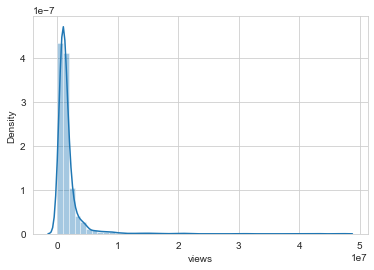

In [19]:
# Distribution of the views on the different TED videos

sns.distplot(df['views'])

D:\A\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='views', ylabel='Density'>

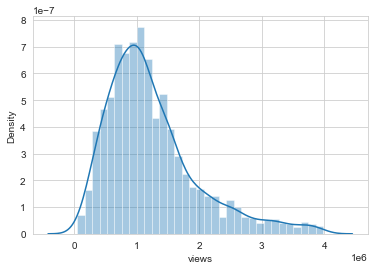

In [20]:
# plot views less than 4,000,000

sns.distplot(df[df['views'] < 4000000]['views'])

D:\A\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='views', ylabel='Density'>

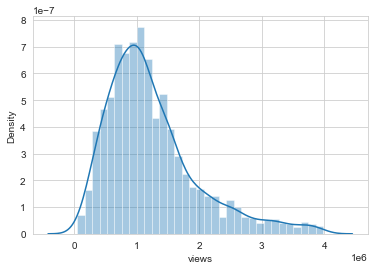

In [21]:
# 多条件布尔索引

sns.distplot(df[(df['views'] > 5000) & (df['views'] < 4000000)]['views']) 

# 5000 : 0.5e4
# 4000000: 0.4e7

In [22]:
df.views.describe()

count    2.550000e+03
mean     1.698297e+06
std      2.498479e+06
min      5.044300e+04
25%      7.557928e+05
50%      1.124524e+06
75%      1.700760e+06
max      4.722711e+07
Name: views, dtype: float64

- Analysis：

    - The average number of views on TED Talks is 1.6 million, and the median number of views is 1.12 million. This suggests a very high average level of popularity of TED Talks. We also notice that the majority of talks have views less than 4 million. We will consider this as the cutoff point when costructing box plots in the later sections.






## 2. Comments



- Although the TED website gives us access to all the comments posted publicly, this dataset only gives us the number of comments. We will therefore have to restrict our analysis to this feature only. You could try performing textual analysis by scraping the website for comments.

In [23]:
df['comments'].describe()

count    2550.000000
mean      191.562353
std       282.315223
min         2.000000
25%        63.000000
50%       118.000000
75%       221.750000
max      6404.000000
Name: comments, dtype: float64





### Observations



- On average, there are **191.6 comments** on every TED Talk. Assuming the comments are constructive criticism, we can conclude that the TED Online Community is highly involved in discussions revolving TED Talks.



- There is a **huge standard deviation** associated with the comments. In fact, it is even larger than the mean suggesting that the measures may be sensitive to outliers. We shall plot this to check the nature of the distribution.



- The **minimum** number of comments on a talk is **2** and the **maximum** is **6404**. The range is 6402.. The minimum number, though, may be as a result of the talk being posted extremely recently.

D:\A\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='comments', ylabel='Density'>

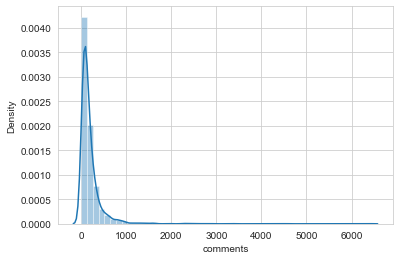

In [24]:
sns.distplot(df['comments'])

D:\A\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='comments', ylabel='Density'>

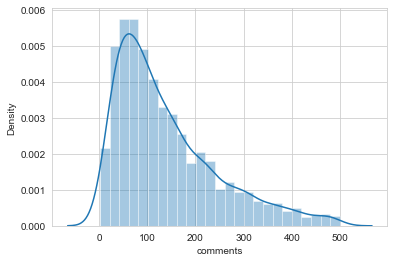

In [25]:
sns.distplot(df[df['comments'] < 500]['comments'])

#### Analysis:

- From the plot above, we can see that the **bulk of the talks** have **fewer than 500 comments**. It clearly suggests that **the mean** obtained above has been **heavily influenced by outliers**. This is possible because the number of samples is only 2550 talks.

> Another question that I am interested in is if the number of views is correlated with the number of comments. We should think that this is the case as more popular videos tend to have more comments. Let us find out.

<Figure size 1224x864 with 0 Axes>

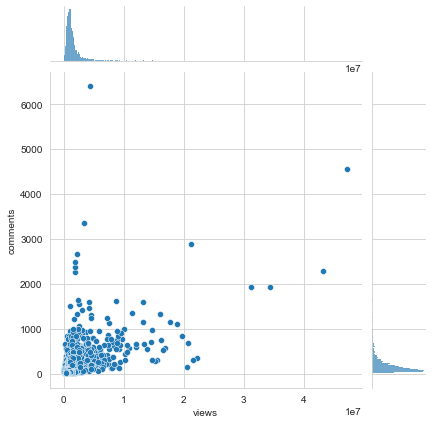

In [26]:
sns.set_style('whitegrid')
plt.figure(figsize=(17,12))

sns.jointplot(x = 'views',
              y = 'comments',
              data=df)

In [27]:
# we also can find out the correlation between views and comments

df[['views','comments']].corr()

,views,comments
views,1.000000,0.530939
comments,0.530939,1.000000


#### Analysis:



- As the scatterplot and the correlation matrix show, the coefficient is **slightly more than 0.5**. This suggests a medium to **strong correlation** between the two quantities. This result was pretty expected as mentioned above. 

> Let us now check the number of views and comments on the 10 most commented TED Talks of all time.

In [28]:
df[['title',
    'main_speaker',
    'views',
    'comments']].sort_values(by='comments',
                             ascending=False).head(10)

,title,main_speaker,views,comments
96,Militant atheism,Richard Dawkins,4374792,6404
0,Do schools kill creativity?,Ken Robinson,47227110,4553
644,Science can answer moral questions,Sam Harris,3433437,3356
201,My stroke of insight,Jill Bolte Taylor,21190883,2877
1787,How do you explain consciousness?,David Chalmers,2162764,2673
954,Taking imagination seriously,Janet Echelman,1832930,2492
840,On reading the Koran,Lesley Hazleton,1847256,2374
1346,Your body language may shape who you are,Amy Cuddy,43155405,2290
661,The danger of science denial,Michael Specter,1838628,2272
677,How great leaders inspire action,Simon Sinek,34309432,1930


#### Observation：


- As can be seen above, Richard Dawkins' talk on **"Militant Atheism"** generated the greatest amount of discussion and opinions despite having significantly lesser views than Ken Robinson's talk, which is second in the list. This raises some interesting questions.

> Which talks tend to attract the largest amount of discussion?



- To answer this question, we will define a new feature **discussion quotient** which is simply **the ratio** of the number of **comments to the number of views**. We will then check which talks have the largest discussion quotient.

In [29]:
df['comments_per_view'] = df['comments'] / df['views']

In [30]:
# have a look of the 10 most comments_per_view

df[['title',
    'main_speaker',
    'comments',
    'views',
    'comments_per_view',
    'film_date']].sort_values(by='comments_per_view',
                              ascending=False).head(10)

,title,main_speaker,comments,views,comments_per_view,film_date
744,The case for same-sex marriage,Diane J. Savino,649,292395,0.002220,02-12-2009
803,E-voting without fraud,David Bismark,834,543551,0.001534,14-07-2010
96,Militant atheism,Richard Dawkins,6404,4374792,0.001464,02-02-2002
694,Inside a school for suicide bombers,Sharmeen Obaid-Chinoy,1502,1057238,0.001421,10-02-2010
954,Taking imagination seriously,Janet Echelman,2492,1832930,0.001360,03-03-2011
840,On reading the Koran,Lesley Hazleton,2374,1847256,0.001285,10-10-2010
876,Curating humanity's heritage,Elizabeth Lindsey,555,439180,0.001264,08-12-2010
1787,How do you explain consciousness?,David Chalmers,2673,2162764,0.001236,18-03-2014
661,The danger of science denial,Michael Specter,2272,1838628,0.001236,11-02-2010
561,Dance to change the world,Mallika Sarabhai,595,481834,0.001235,04-11-2009


### Analysis:


- This analysis has actually raised extremely interesting insights. Half of the talks in the top 10 are on the lines of **Faith and Religion**. I suspect science and religion are still a very hotly debated topic even in the 21st century. We shall come back to this hypothesis in a later section.




- The most discusses talk, though, is **The Case for Same Sex Marriage** (which has religious undertones). This is not that surprising considering the amount of debate the topic caused back in 2009 (the time the talk was filmed).






## 3. Main Speaker

> In this section, we will try and gain insight about all the amazing speakers who have managed to inspire millions of people through their talks on the TED Platform. 


> The first question we shall ask in this section is who are the most popular TED Speakers. That is, which speakers have given the most number of TED Talks.

In [31]:
speaker = df.groupby('main_speaker').count().reset_index()[['main_speaker',
                                                            'comments']]
speaker

,main_speaker,comments
0,OK Go,1
1,Rodrigo y Gabriela,1
2,Silk Road Ensemble,1
3,Sofi Tukker,1
4,AJ Jacobs,3
...,...,...
2151,Ziauddin Yousafzai,1
2152,Ziyah Gafić,1
2153,Zubaida Bai,1
2154,eL Seed,2


In [32]:
speaker.columns = ['main_speaker','appearances']

speaker = speaker.sort_values(by = 'appearances',
                              ascending=False)

In [33]:
top_10_popular_speaker = speaker.head(10)

top_10_popular_speaker

,main_speaker,appearances
770,Hans Rosling,9
1066,Juan Enriquez,7
1693,Rives,6
1278,Marco Tempest,6
397,Clay Shirky,5
1487,Nicholas Negroponte,5
1075,Julian Treasure,5
424,Dan Ariely,5
850,Jacqueline Novogratz,5
248,Bill Gates,5


#### Analysis:




- **Hans Rosling**, the Swiss Health Professor is clearly the **most popular** TED Speaker, with **9 appearances** on the TED Forum. **Juan Enriquez** comes a close second with **7 appearances**. **Rives and Marco Tempest** have graced the TED platform **6 times**.

> Which **occupation** should you choose if you want to become a TED Speaker? Let us have a look what kind of people TED is most interested in inviting to its events.

In [34]:
occupation = df.groupby('speaker_occupation').count().reset_index()[['speaker_occupation',
                                                                     'comments']]

occupation

,speaker_occupation,comments
0,Chairman of the Cordoba Initiative,1
1,"Child protection leader, activist, author",1
2,Robotics engineer,1
3,Space physicist,1
4,3D printer,1
...,...,...
1453,e-Patient,1
1454,"inventor, engineer",1
1455,medical inventor,1
1456,photographer + visual artist,1


In [35]:
occupation.columns = ['occupation','appearances']

occupation = occupation.sort_values(by='appearances',
                                    ascending=False)

occupation.head(10)

,occupation,appearances
1426,Writer,45
83,Artist,34
413,Designer,34
753,Journalist,33
515,Entrepreneur,31
71,Architect,30
733,Inventor,27
1131,Psychologist,26
1011,Photographer,25
567,Filmmaker,21


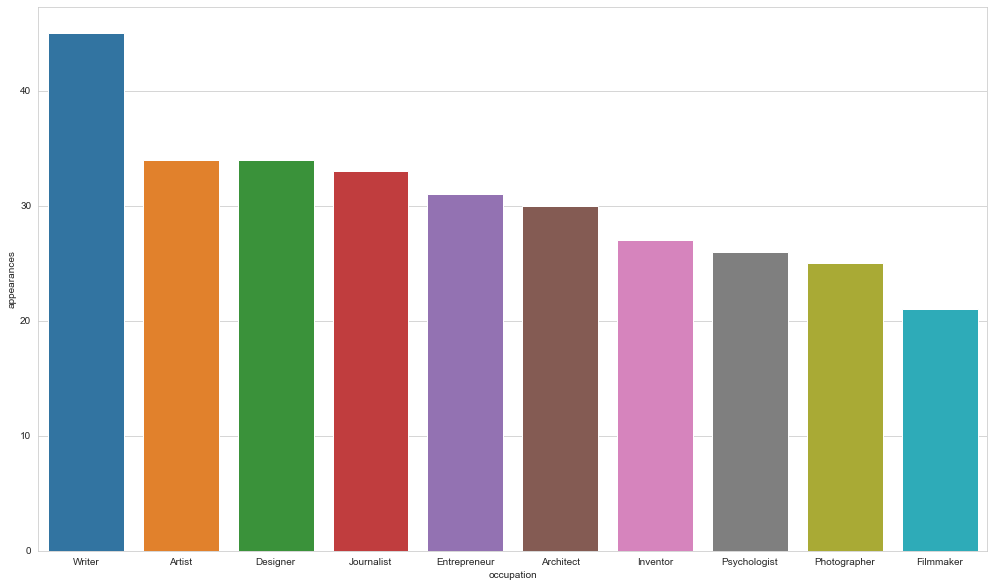

In [36]:
plt.figure(figsize=(17,10))

sns.barplot(x = 'occupation',
            y = 'appearances',
            data = occupation.head(10))

plt.show()

#### Observations





- **Writers** are the **most popular** with 45 speakers identifying themselves as mentioned.




- **Artists** and **Designers** come a distant second with 34 speakers in each category.




- This result must be taken with a pinch of salt as a considerable number of speakers identify themselves with multiple professions (for example, writer/entrepreneur).

> Do some professions tend to attract a larger number of viewers? 


- Do answer this question let us visualise the relationship between the top 10 most popular professions and the views thet garnered in the form of a box plot.

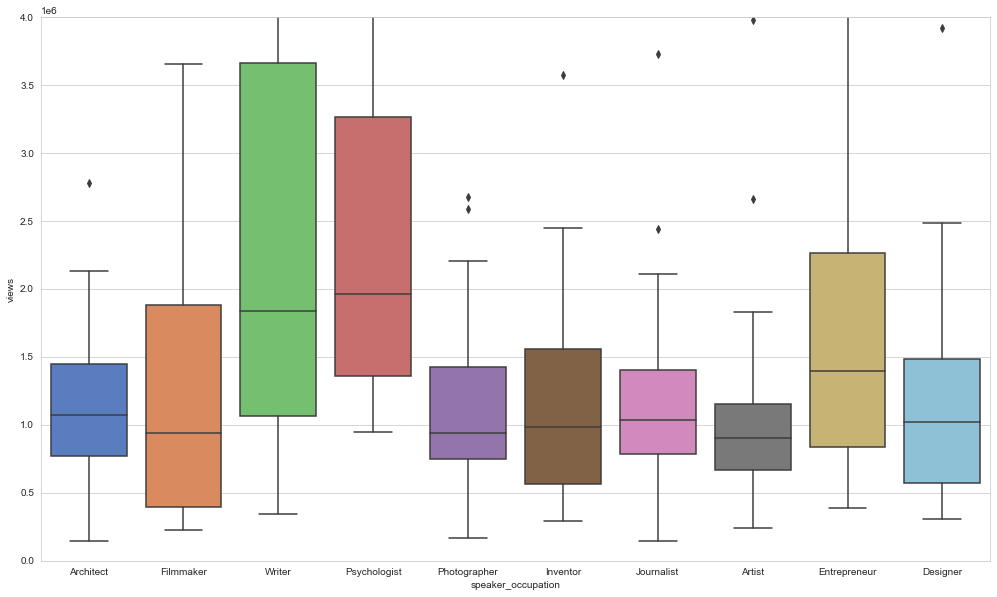

In [37]:
fig, ax = plt.subplots(nrows=1,
                       ncols=1,
                       figsize=(17,10))

sns.boxplot(x = 'speaker_occupation',
            y = 'views',
            data = df[df['speaker_occupation'].isin(occupation.head(10)['occupation'])],
            palette = 'muted',
            ax = ax)

ax.set_ylim([0, 0.4e7])

plt.show()

#### Analysis:




- On average, out of the top 10 most popular professions, **Psychologists** tend to obtain the most views. **Writers** have the greatest range of views between the first and the third quartile..

> Then, let's check how many speakers are there on TED Talks?

In [38]:
df['num_speaker'].value_counts()

1    2492
2      49
3       5
4       3
5       1
Name: num_speaker, dtype: int64

#### Analysis:



- Almost every talk has just one speaker. There are 49 talks where two people shared the stage. The maximum number of speakers to share a single stage was 5. I suspect this was a dance performance. Let's have a look.

In [39]:
# check whether the talk including 5 speakers was related to dance performance.

df[df['num_speaker'] == 5][['title','main_speaker','description','film_date']]

,title,main_speaker,description,film_date
2507,A dance to honor Mother Earth,Jon Boogz and Lil Buck,Movement artists Jon Boogz and Lil Buck debut ...,24-04-2017


> Finally, Let’s find out who talked for a longer time than other speakers.

In [40]:
#Lets see who talked a lot( find out the top 15)

top_15_talk_most = df[['title',
                       'main_speaker',
                       'duration',
                       'film_date']].sort_values(by = 'duration',
                                                 ascending=False).head(15)

top_15_talk_most

,title,main_speaker,duration,film_date
640,"Parrots, the universe and everything",Douglas Adams,5256,16-05-2001
588,Really achieving your childhood dreams,Randy Pausch,4587,18-09-2007
629,Physics is fun to imagine,Richard Feynman,3955,09-07-1983
2387,Nationalism vs. globalism: the new political d...,Yuval Noah Harari,3608,15-02-2017
594,Stories of Haiti,Edwidge Danticat,3573,13-10-2004
600,Growing up in the universe,Richard Dawkins,3475,20-12-1991
580,What's the right thing to do?,Michael Sandel,3296,01-09-2005
2421,Political common ground in a polarized United ...,"Gretchen Carlson, David Brooks",2853,01-03-2017
947,Authentic creativity vs. karaoke culture,Malcolm McLaren,2761,06-10-2009
202,My days as a young rebel,Frank Gehry,2678,03-03-1990


Text(0, 0.5, 'Main speaker')

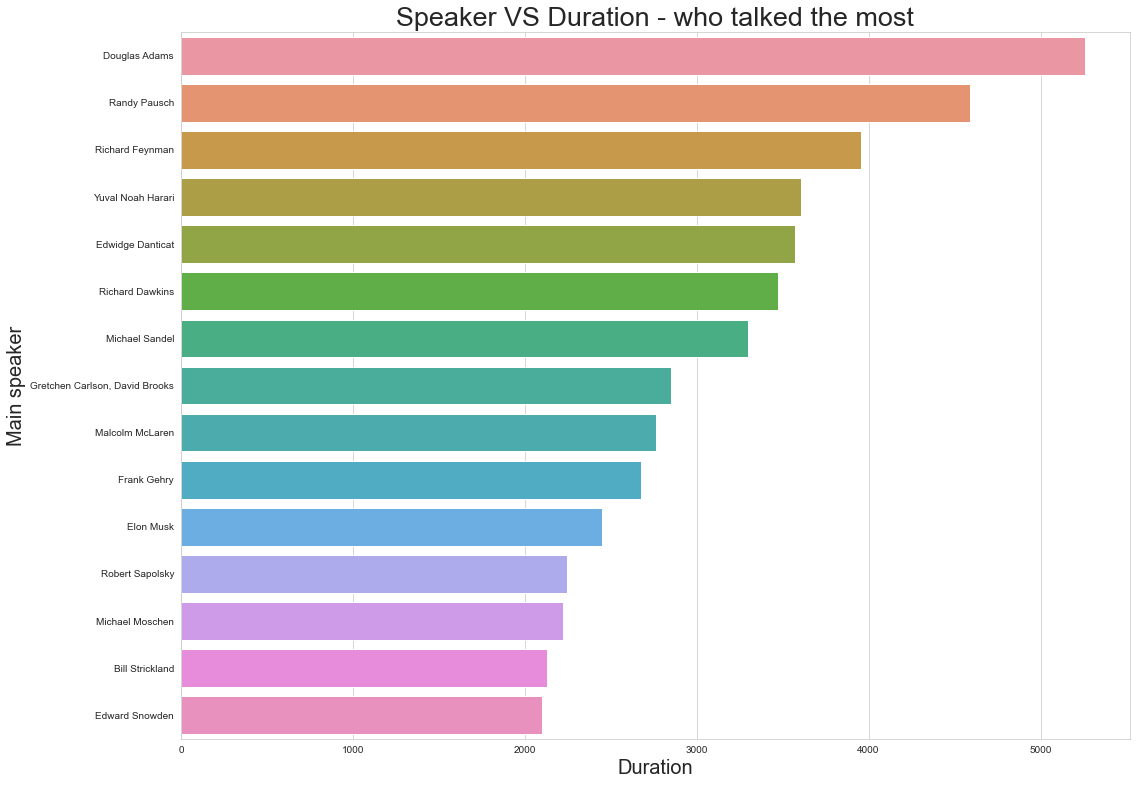

In [41]:
sns.set_style('whitegrid')
plt.figure(figsize=(17,13))

sns.barplot(x = 'duration',
            y = 'main_speaker',
            data = top_15_talk_most)

plt.title('Speaker VS Duration - who talked the most', fontsize=27)
plt.xlabel('Duration', fontsize=20)
plt.ylabel('Main speaker', fontsize=20)

#### Analysis:




- The above plot shows, **Douglas Adams** talked for really long time. A lot people do not like to watch longer videos unless it is very interesting. 


## 5. Analysing TED in day, month and year

> TED (especially TEDx) Talks tend to occur all throughout the year. 


> Is there a hot month as far as TED is concerned? In other words, how are the talks distributed throughout the months since its inception? Let us find out.

In [42]:
month_order = ['Jan', 'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

day_order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

### Month

In [43]:
df['month'] = df['film_date'].apply(lambda x: month_order[int(x.split('-')[1]) - 1])

df['month'].head()

0    Feb
1    Feb
2    Feb
3    Feb
4    Feb
Name: month, dtype: object

In [44]:
month = pd.DataFrame(df['month'].value_counts()).reset_index()


month.columns = ['month','talks']

month

,month,talks
0,Feb,601
1,Mar,397
2,Jun,270
3,Jul,253
4,Nov,232
5,Oct,208
6,Apr,173
7,Dec,123
8,May,123
9,Sep,107


Text(0, 0.5, 'Talks')

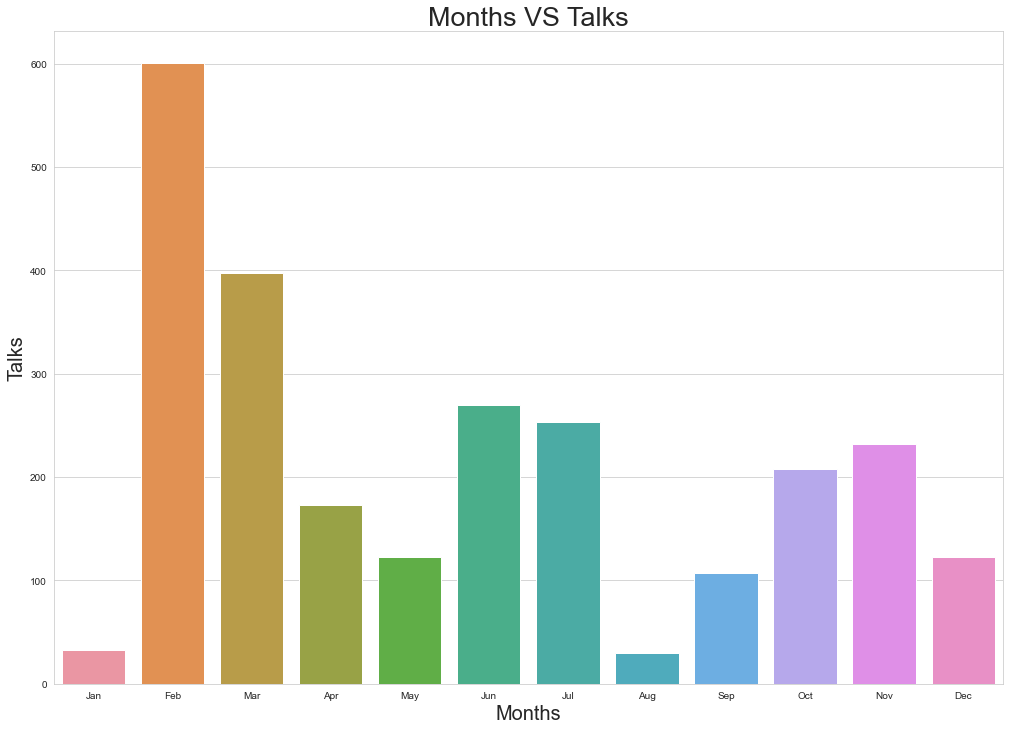

In [45]:
sns.set_style('whitegrid')
plt.figure(figsize=(17,12))

sns.barplot(x = 'month',
            y = 'talks',
            data = month,
            order = month_order)

plt.title('Months VS Talks', fontsize=27)
plt.xlabel('Months', fontsize=20)
plt.ylabel('Talks', fontsize=20)

#### Analysis:




- From the above plot, **February** is clearly the **most popular month** for TED Conferences whereas **August and January** are the **least popular**. February's popularity is largely due to the fact that the official TED Conferences are held in February. 


> Let us check the distribution for TEDx talks only.



In [46]:
TEDx = df[df['event'].str.contains('TEDx')]

In [47]:
TEDx_month = pd.DataFrame(TEDx['month'].value_counts()).reset_index()

TEDx_month.columns = ['month','talks']

Text(0, 0.5, 'TEDx_Talks')

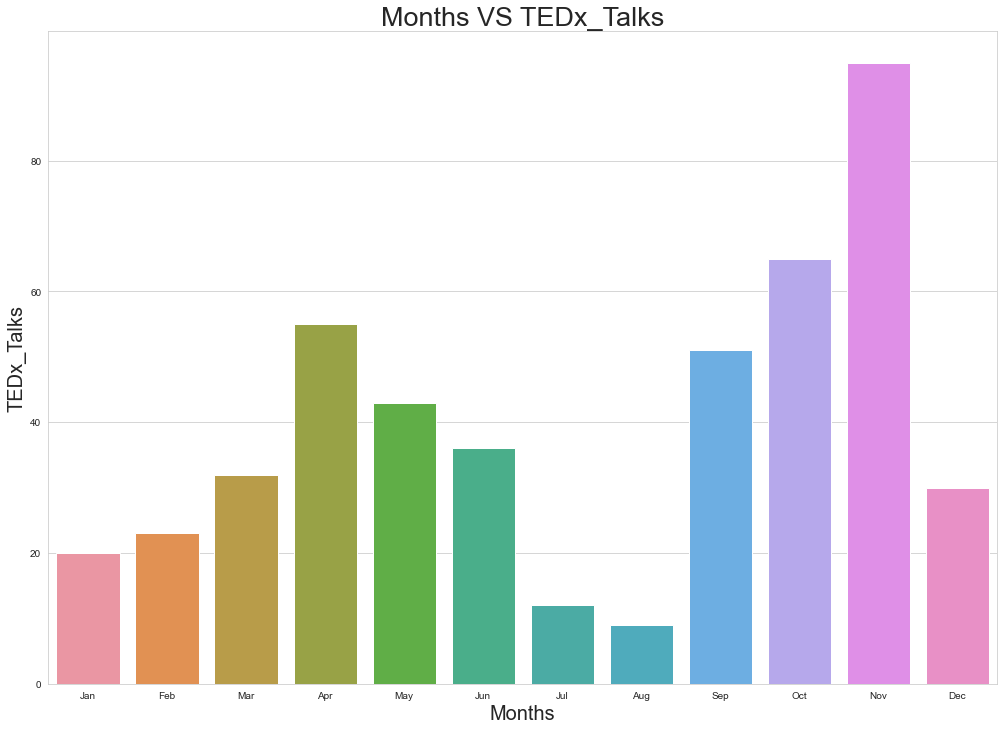

In [48]:
sns.set_style('whitegrid')
plt.figure(figsize=(17,12))

sns.barplot(x = 'month',
            y = 'talks',
            data = TEDx_month,
            order = month_order)

plt.title('Months VS TEDx_Talks', fontsize=27)
plt.xlabel('Months', fontsize=20)
plt.ylabel('TEDx_Talks', fontsize=20)

#### Analysis:



- As far as TEDx talks are concerned, **November** is the **most popular month**. However, we cannot take this result at face value as very few of the TEDx talks are actually uploaded to the TED website and therefore, it is entirely possible that the sample in our dataset is not at all representative of all TEDx talks. **A slightly more accurate statement** would be that the **most popular TEDx talks take place the most in October and November**.

### Day

> Next, let's explore TED Talks in days.

In [49]:
# 使用datetime的strftime()方法获取一个日期是星期几

def get_day(x):
    day, month, year = (int(i) for i in x.split('-'))
    
    answer = dt.date(year, month, day).strftime('%A')
    
    return answer[:3]


# 方法二：
# 使用datetime的weekday()方法获取一个日期是一周里的第几天
# 用这个当索引在day_order里取相应的value值

#def get_day1(x):
#    day, month, year = (int(i) for i in x.split('-'))
    
#    answer = dt.date(year, month, day).weekday()
    
#    return day_order[answer]

In [50]:
df['day'] = df['film_date'].apply(get_day)

In [51]:
day = pd.DataFrame(df['day'].value_counts()).reset_index()

day.columns = ['day','talks']

<AxesSubplot:xlabel='day', ylabel='talks'>

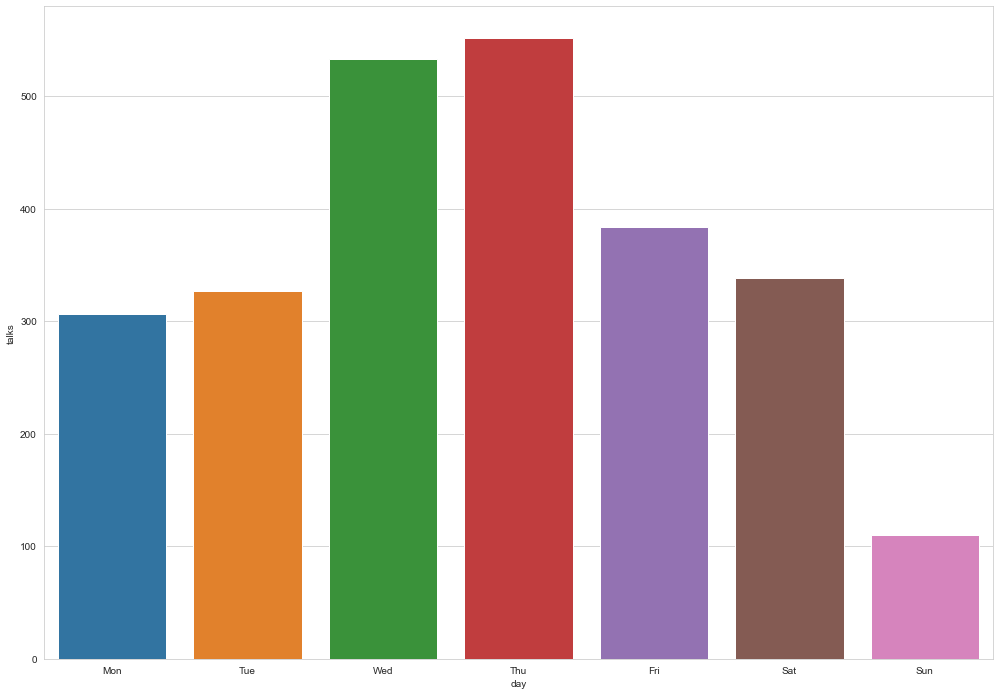

In [52]:
sns.set_style('whitegrid')
plt.figure(figsize=(17,12))

sns.barplot(x = 'day',
            y = 'talks',
            data = day,
            order = day_order)

#### Analysis:





- The distribution of days is almost like a bell curve with **Wednesday and Thursday** being the **most popular days** and **Sunday** being the **least popular**. This is pretty interesting because I was of the opinion that most TED Conferences would happen sometime in the weekend.

### Year

> Let us now visualize the number of TED talks through the years and check if our prediction that they have grown significantly is indeed true.

In [53]:
df['year'] = df['film_date'].apply(lambda x: x.split('-')[2])

In [55]:
year = pd.DataFrame(df['year'].value_counts()).reset_index()

year.columns = ['year','talks']

year = year.sort_values(by = 'year', ascending=True)

year

,year,talks
19,1972,1
18,1983,1
22,1984,1
20,1990,1
23,1991,1
21,1994,1
16,1998,6
17,2001,5
15,2002,27
14,2003,33


<AxesSubplot:xlabel='year', ylabel='talks'>

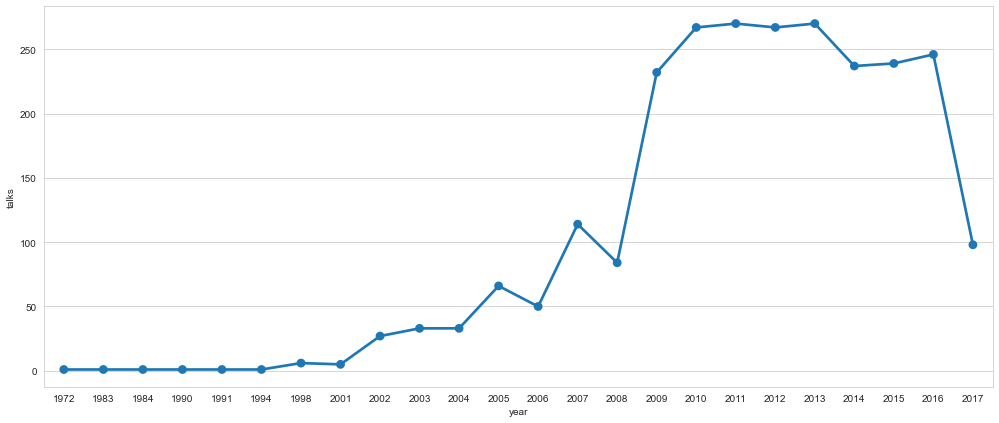

In [56]:
sns.set_style('whitegrid')
plt.figure(figsize=(17,7))


sns.pointplot(x = 'year',
              y = 'talks',
              data = year)

### Analysis:


- As expected, the number of TED Talks have gradually increased over the years since its inception in 1972.



- There was a **sharp increase** in the number if talks **in 2009**. It might be interesting to know the reasons behind 2009 being the tipping point where the number of talks increased more than twofold.


- The number of talks keeps been pretty much constant since 2009.

### Summary about day, month and year

> Finally, to put it all together, let us construct a heatmap that shows us the number of talks by month and year. This will give us a good summary of the distribution of talks.

In [57]:
months = {'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,
          'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}

In [58]:
heat_map = df.copy()

In [59]:
heat_map['film_date'] = heat_map['film_date'
                                 ].apply(lambda x: month_order[int(x.split('-')[1]) - 1] + " " + str(x.split('-')[2]))

In [60]:
heat_map = pd.pivot_table(heat_map[['film_date','title']],
                          index = 'film_date',
                          aggfunc = 'count').reset_index()

In [61]:
heat_map['month'] = heat_map['film_date'].apply(lambda x: months[x.split()[0]])

In [62]:
heat_map['year'] = heat_map['film_date'].apply(lambda x: x.split()[1])

In [63]:
heat_map = heat_map.sort_values(['year','month'])

heat_map = heat_map[['month','year','title']]

heat_map = heat_map.pivot('month','year','title')

heat_map = heat_map.fillna(0)

<AxesSubplot:xlabel='year', ylabel='month'>

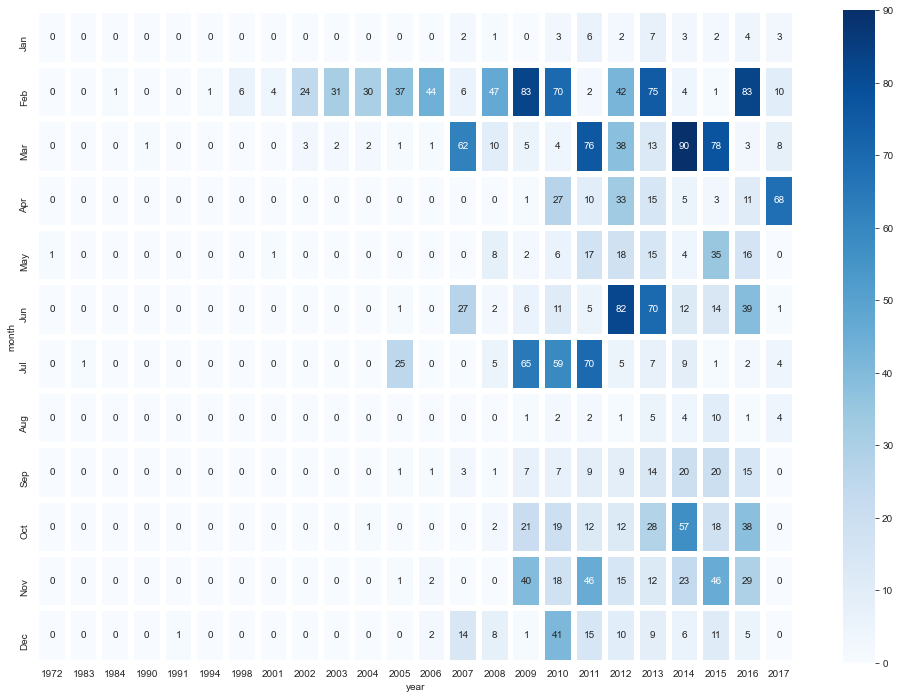

In [64]:
fig, ax = plt.subplots(figsize=(17,12))

sns.heatmap(heat_map,
            annot=True,
            linewidths = 5,
            cmap = 'Blues',
            ax = ax,
            fmt = 'n',
            yticklabels = month_order)

## 6. Events

> Which TED Events tend to hold the most number of TED.com upload worthy events? 

In [65]:
events = df[['title','event']].groupby('event').count().reset_index()

events.columns = ['event','talks']

events = events.sort_values(by = 'talks',
                            ascending=False)

events.head(10)

,event,talks
64,TED2014,84
59,TED2009,83
63,TED2013,77
66,TED2016,77
65,TED2015,75
99,TEDGlobal 2012,70
61,TED2011,70
60,TED2010,68
98,TEDGlobal 2011,68
57,TED2007,68


#### Analysis:




- As expected, the official TED events held the major share of TED Talks published on the TED.com platform. **TED2014** had the **most number** of talks followed by TED2009.

## 7. Languages

> One remarkable aspect of TED Talks is the sheer number of languages in which it is accessible.

In [66]:
df.languages.describe()

count    2550.000000
mean       27.326275
std         9.563452
min         0.000000
25%        23.000000
50%        28.000000
75%        33.000000
max        72.000000
Name: languages, dtype: float64

- On average, a TED Talk is available in 27 different languages. The maximum number of languages a TED Talk is available in is a staggering 72.

In [67]:
# which talk has 72 languages

df[df['languages'] == 72]

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,...,tags,languages,ratings,related_talks,url,views,comments_per_view,month,day,year
973,Matt Cutts: Try something new for 30 days,Try something new for 30 days,"Is there something you've always meant to do, ...",Matt Cutts,Technologist,1,207,TED2011,03-03-2011,01-07-2011,...,"['culture', 'success']",72,"[{'id': 10, 'name': 'Inspiring', 'count': 6171...","[{'id': 947, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/matt_cutts_try_somet...,8838874,0.000083,Mar,Thu,2011


- The most translated TED Talk of all time is **Matt Cutts' Try Something New in 30 Days**. The talk does have a very universal theme of exploration. The sheer number of languages available in demands a little more inspection though as it has just over 8 million views, far fewer than the most popular TED Talks.

> Let's find out if there is a correlation between the number of views and the number of languages.

In [68]:
df[['languages','views']].corr()

,languages,views
languages,1.000000,0.377623
views,0.377623,1.000000


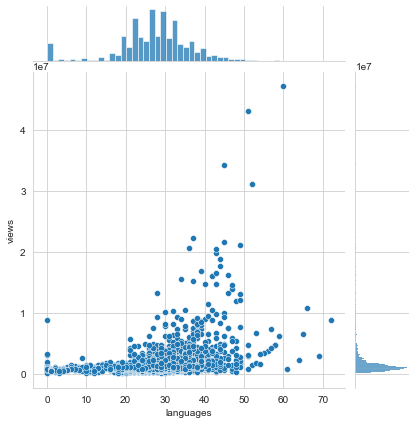

In [69]:
sns.jointplot(x = 'languages',
              y = 'views',
              data = df)

plt.show()

- The Pearson coefficient is about 0.38, suggesting a **medium correlation** between the two quantities.

## 8. Themes


> Let's find out the most popular themes in the TED conferences.

- We need to wrangle our data in a way that it is suitable for analysis. More specifically, we need to split the related_tags list into separate rows.

In [70]:
import ast

In [71]:
df['tags'] = df['tags'].apply(lambda x: ast.literal_eval(x))

In [72]:
s = df.apply(lambda x: pd.Series(x['tags']),
             axis = 1).stack().reset_index(level = 1,
                                           drop = True)

s.name = 'theme'

In [73]:
theme = df.drop(columns = 'tags',
                axis = 1).join(s)

In [74]:
theme.head()

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,...,languages,ratings,related_talks,url,views,comments_per_view,month,day,year,theme
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,25-02-2006,27-06-2006,...,60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,Feb,Sat,2006,children
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,25-02-2006,27-06-2006,...,60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,Feb,Sat,2006,creativity
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,25-02-2006,27-06-2006,...,60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,Feb,Sat,2006,culture
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,25-02-2006,27-06-2006,...,60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,Feb,Sat,2006,dance
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,25-02-2006,27-06-2006,...,60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,Feb,Sat,2006,education


In [75]:
len(theme['theme'].value_counts())

416

- TED defines a staggering 416 different categories for its talks. Let us now check the most popular themes.

> Then, let's talk about the top 10 most popular themes.

In [76]:
pop_theme = pd.DataFrame(theme['theme'].value_counts()).reset_index()

pop_theme.columns = ['theme','talks']

pop_theme.head(10)

,theme,talks
0,technology,727
1,science,567
2,global issues,501
3,culture,486
4,TEDx,450
5,design,418
6,business,348
7,entertainment,299
8,health,236
9,innovation,229


<AxesSubplot:xlabel='talks', ylabel='theme'>

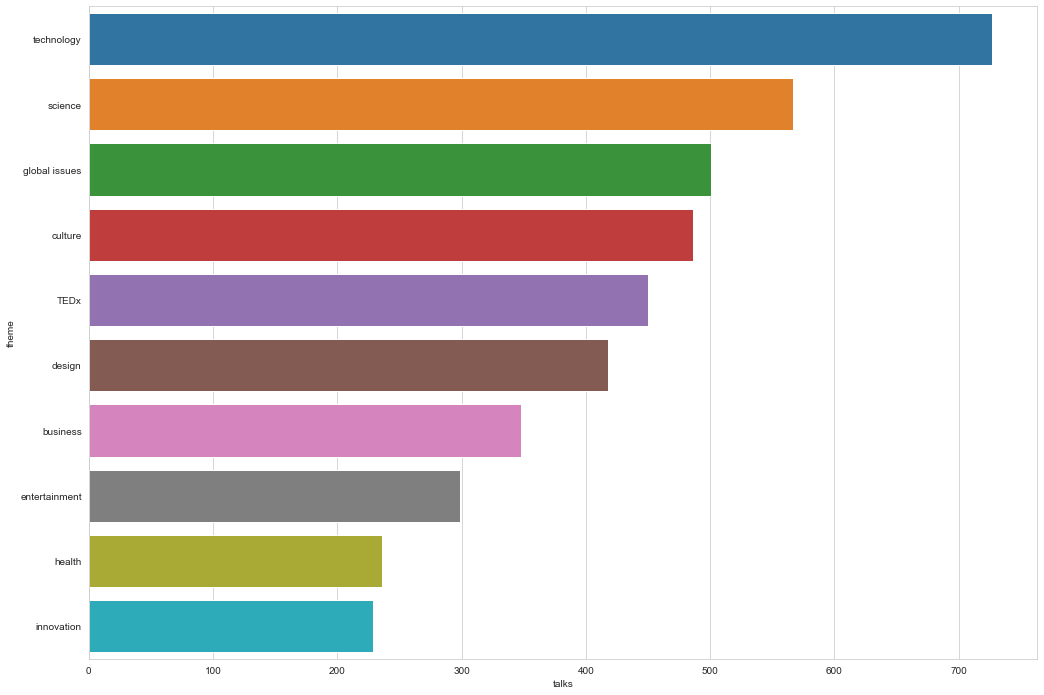

In [77]:
plt.figure(figsize=(17,12))

sns.barplot(x = 'talks',
            y = 'theme',
            data = pop_theme.head(10))

- As may have been expected, **Technology** is the **most popular topic** for talks. **Science and Global Issues** are the second and the third most popular themes respectively.

> Next, let's discuss the trends in the share of topics of TED Talks across the world.





- Just considering the top 7 themes, excluding TEDx and talks after 2009, the year when the number of TED Talks really peaked.

In [78]:
pop_theme_talks = theme[(theme['theme'].isin(pop_theme.head(8)['theme'])) & 
                        (theme['theme'] != 'TEDx')]

In [79]:
pop_theme_talks['year'] = pop_theme_talks['year'].astype('int')

<ipython-input-79-03b97517eb59>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_theme_talks['year'] = pop_theme_talks['year'].astype('int')


In [80]:
pop_theme_talks = pop_theme_talks[pop_theme_talks['year'] > 2008]

In [81]:
themes = list(pop_theme.head(8)['theme'])

themes.remove('TEDx')

ctab = pd.crosstab([pop_theme_talks['year']], pop_theme_talks['theme']).apply(lambda x: x/x.sum(), axis=1)

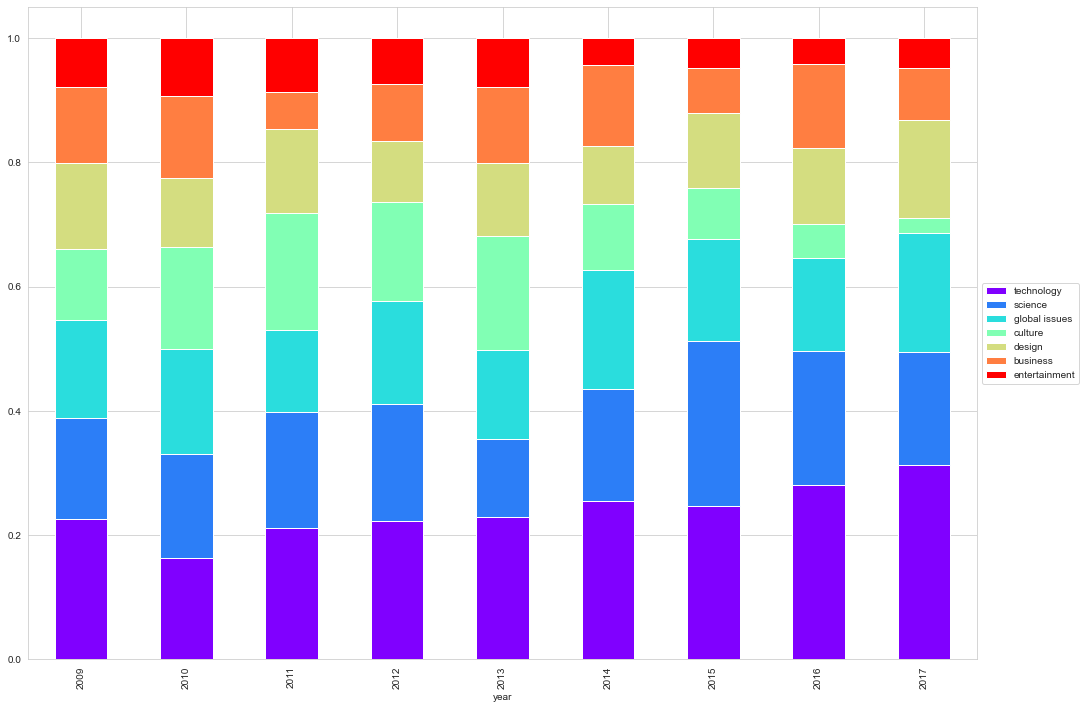

In [82]:
ctab[themes].plot(kind='bar',
                  stacked=True,
                  cmap='rainbow',
                  figsize=(17,12)).legend(loc='center left',
                                         bbox_to_anchor=(1, 0.5))
plt.show()

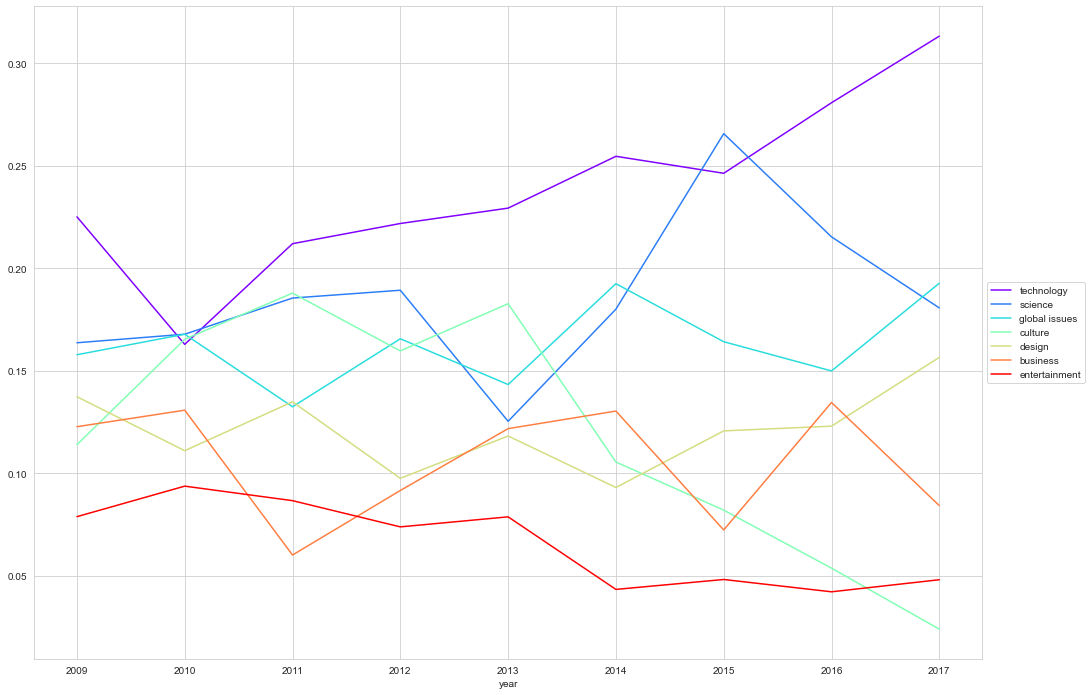

In [83]:
ctab[themes].plot(kind='line',
                  stacked=False, 
                  cmap='rainbow',
                  figsize=(17,12)).legend(loc='center left',
                                          bbox_to_anchor=(1, 0.5))
plt.show()

- The proportion of technology talks has steadily increased over the years with a slight dip in 2010. It is quite understandable considering the **boom of technologies** such as blockchain, deep learning and augmented reality capturing people's imagination.




- Talks on culture have witnessed a dip, decreasing steadily starting 2013. The share of culture talks has been the least in 2017. Entertainment talks also seem to have witnessed a slight decline in popularity since 2009.




> Like with the speaker occupations, let us investigate if certain topics tend to garner more views than certain other topics. We will be doing this analysis for  using the box plot to deduce this relation.

In [84]:
pop_theme_talks = theme[theme['theme'].isin(pop_theme.head(10)['theme'])]

(0.0, 4000000.0)

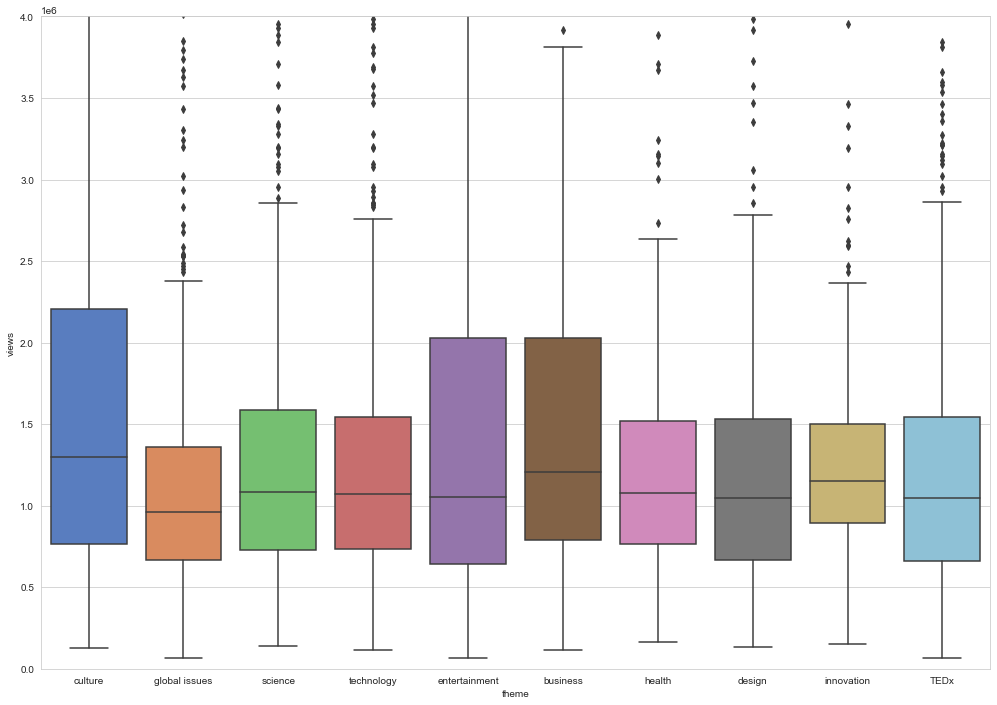

In [85]:
fig, ax = plt.subplots(nrows=1,
                       ncols=1,
                       figsize=(17,12))

sns.boxplot(x = 'theme',
            y = 'views',
            data = pop_theme_talks,
            palette = 'muted',
            ax = ax)

ax.set_ylim([0, 0.4e7])

- Although culture has lost its share in the number of TED Talks over the years, it obtains the highest median number of views.

## 9. Duration

In [86]:
# Convert duration into minutes

df['duration'] = df['duration'] / 60
df['duration'].describe()

count    2550.000000
mean       13.775170
std         6.233486
min         2.250000
25%         9.616667
50%        14.133333
75%        17.445833
max        87.600000
Name: duration, dtype: float64

- The **average duration of TED Talks is 13.7 minutes** long. I find this mean surprising because in my mind, TED Talks often last about 18 minutes and the average is a good 4.3 minutes shorter than that.

- The **shortest TED Talk** on record is **2.25 minutes** long whereas the **longest talk** is **87.6 minutes** long. 

> Let us look at both the shortest and the longest talk.

In [87]:
# shortest TED

df[df['duration'] == 2.25]

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,...,tags,languages,ratings,related_talks,url,views,comments_per_view,month,day,year
239,Murray Gell-Mann: The ancestor of language,The ancestor of language,After speaking at TED2007 on elegance in physi...,Murray Gell-Mann,Physicist,1,2.25,TED2007,03-03-2007,11-06-2008,...,"[culture, global issues, history, language, ph...",61,"[{'id': 22, 'name': 'Fascinating', 'count': 78...","[{'id': 161, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/murray_gell_mann_on_...,785293,0.000097,Mar,Sat,2007


In [88]:
# longest TED

df[df['duration'] == 87.6]

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,...,tags,languages,ratings,related_talks,url,views,comments_per_view,month,day,year
640,"Douglas Adams: Parrots, the universe and every...","Parrots, the universe and everything","Blind river dolphins, reclusive lemurs, a parr...",Douglas Adams,"Author, satirist",1,87.6,University of California,16-05-2001,17-03-2010,...,"[biodiversity, biology, comedy, humor, life, r...",0,"[{'id': 22, 'name': 'Fascinating', 'count': 29...","[{'id': 635, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/douglas_adams_parrot...,473220,0.000213,May,Wed,2001


#### We have dicsussed the relationship bewteen main_speaker and duration before.

Text(0, 0.5, 'Main speaker')

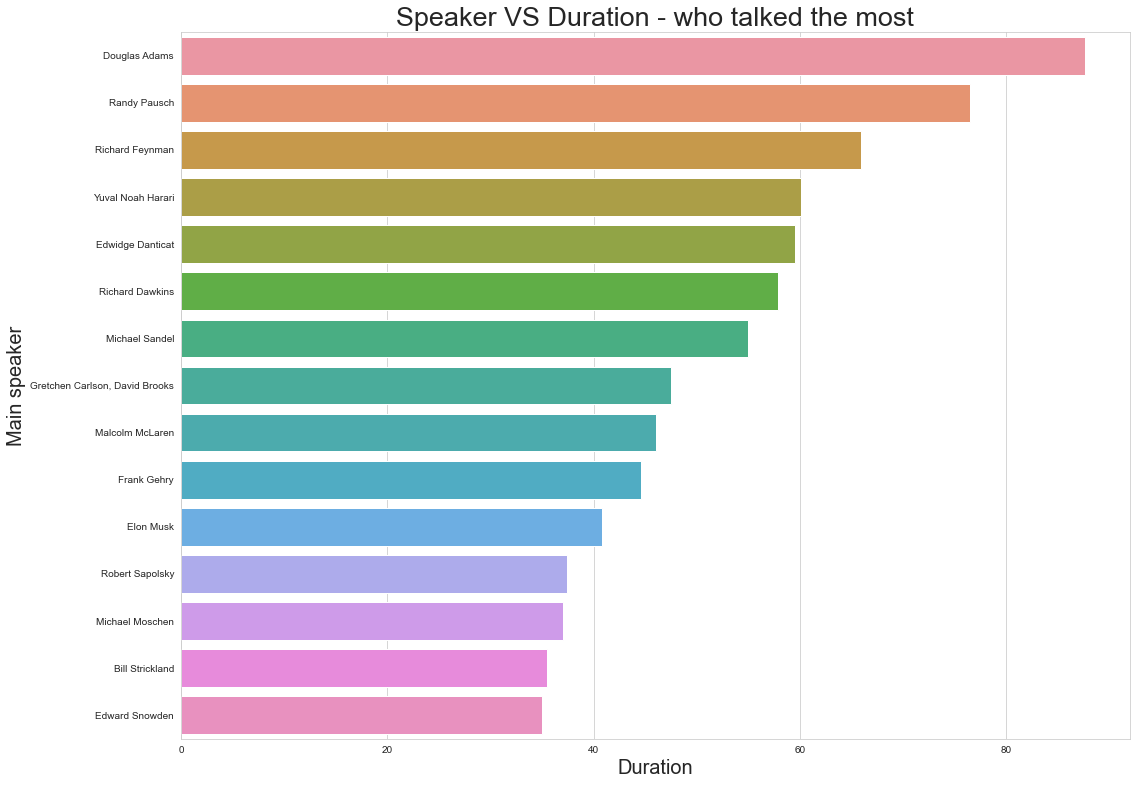

In [89]:
sns.set_style('whitegrid')
plt.figure(figsize=(17,13))

sns.barplot(x = 'duration',
            y = 'main_speaker',
            data = df.sort_values(by='duration',
                                  ascending=False).head(15))

plt.title('Speaker VS Duration - who talked the most', fontsize=27)
plt.xlabel('Duration', fontsize=20)
plt.ylabel('Main speaker', fontsize=20)

Text(0, 0.5, 'Main speaker')

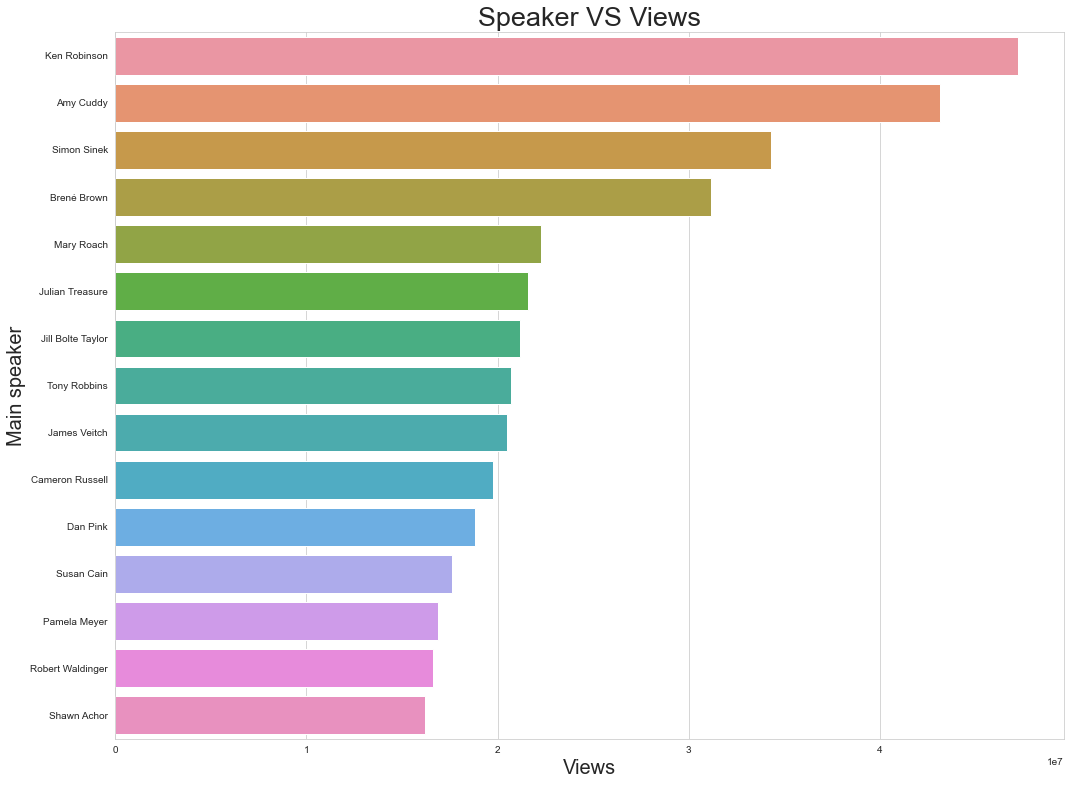

In [90]:
sns.set_style('whitegrid')
plt.figure(figsize=(17,13))

sns.barplot(x = pop_talks_15.views,
            y = pop_talks_15.main_speaker)

plt.title('Speaker VS Views', fontsize=27)
plt.xlabel('Views', fontsize=20)
plt.ylabel('Main speaker', fontsize=20)

#### Analysis:
- In the above plot, as we can see **Douglas Adam** is **not** here but a lot name are here from previous plot. 

> Is there any relationship between view and duration? 



- Could be, let’s find out.
- First we will check the distribution of data and then if views and duration are anywhere related/dependent.

> Let’s find out how many views these speaker has got.

D:\A\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

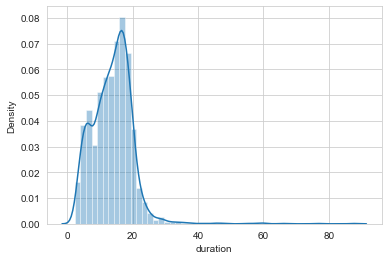

In [91]:
# let's see the distribution of duration

sns.distplot(df['duration'])

Text(336.9714285714286, 0.5, 'Views')

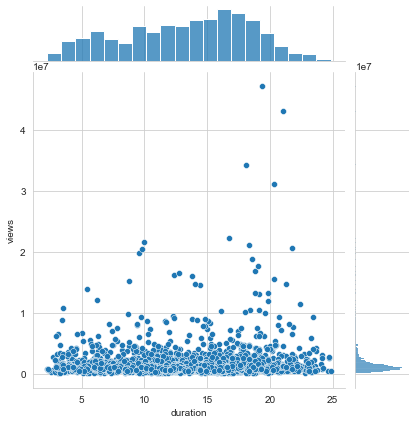

In [92]:
# Let’s see if they have any correlation?

sns.jointplot(x = 'duration',
              y = 'views',
              data = df[df['duration'] < 25])

plt.xlabel('Duration')
plt.ylabel('Views')

In [93]:
df[['duration','views']].corr()

,duration,views
duration,1.00000,0.04874
views,0.04874,1.00000


### Analysis:




- There is no correlation between the views and the duration. Because their correlation coefficient is very low, only about 0.049.

# 10. Ratings

> Let's find out the most popular categories of TED Talks.

In [94]:
df.head()

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,...,tags,languages,ratings,related_talks,url,views,comments_per_view,month,day,year
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,19.400000,TED2006,25-02-2006,27-06-2006,...,"[children, creativity, culture, dance, educati...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,Feb,Sat,2006
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,16.283333,TED2006,25-02-2006,27-06-2006,...,"[alternative energy, cars, climate change, cul...",43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,3200520,0.000083,Feb,Sat,2006
2,David Pogue: Simplicity sells,Simplicity sells,New York Times columnist David Pogue takes aim...,David Pogue,Technology columnist,1,21.433333,TED2006,24-02-2006,27-06-2006,...,"[computers, entertainment, interface design, m...",26,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/david_pogue_says_sim...,1636292,0.000076,Feb,Fri,2006
3,Majora Carter: Greening the ghetto,Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",Majora Carter,Activist for environmental justice,1,18.600000,TED2006,26-02-2006,27-06-2006,...,"[MacArthur grant, activism, business, cities, ...",35,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/majora_carter_s_tale...,1697550,0.000118,Feb,Sun,2006
4,Hans Rosling: The best stats you've ever seen,The best stats you've ever seen,You've never seen data presented like this. Wi...,Hans Rosling,Global health expert; data visionary,1,19.833333,TED2006,22-02-2006,28-06-2006,...,"[Africa, Asia, Google, demo, economics, global...",48,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/hans_rosling_shows_t...,12005869,0.000049,Feb,Wed,2006


In [95]:
# just a look of one row's ratings
df.iloc[1]['ratings'] 

"[{'id': 7, 'name': 'Funny', 'count': 544}, {'id': 3, 'name': 'Courageous', 'count': 139}, {'id': 2, 'name': 'Confusing', 'count': 62}, {'id': 1, 'name': 'Beautiful', 'count': 58}, {'id': 21, 'name': 'Unconvincing', 'count': 258}, {'id': 11, 'name': 'Longwinded', 'count': 113}, {'id': 8, 'name': 'Informative', 'count': 443}, {'id': 10, 'name': 'Inspiring', 'count': 413}, {'id': 22, 'name': 'Fascinating', 'count': 132}, {'id': 9, 'name': 'Ingenious', 'count': 56}, {'id': 24, 'name': 'Persuasive', 'count': 268}, {'id': 23, 'name': 'Jaw-dropping', 'count': 116}, {'id': 26, 'name': 'Obnoxious', 'count': 131}, {'id': 25, 'name': 'OK', 'count': 203}]"

In [96]:
df['ratings'] = df['ratings'].apply(lambda x: ast.literal_eval(x))

> Then, let's find out which talks were rated the funniest, the most beautiful, the most confusing, the most fascinating and most jaw-dropping of all time.

- Firstly define 5 extra features to finish our task.

In [97]:
df['funny'] = df['ratings'].apply(lambda x: x[0]['count'])

df['confusing'] = df['ratings'].apply(lambda x: x[2]['count'])

df['beautiful'] = df['ratings'].apply(lambda x: x[3]['count'])

df['fascinating'] = df['ratings'].apply(lambda x: x[-6]['count'])

df['jawdrop'] = df['ratings'].apply(lambda x: x[-3]['count'])

#### Funniest Talks (Top10)

In [98]:
df[['title',
    'main_speaker',
    'funny',
    'views',
    'comments',
    'published_date']].sort_values(by = 'funny',
                          ascending=False)[:10]

,title,main_speaker,funny,views,comments,published_date
837,The power of vulnerability,Brené Brown,21444,31168150,1927,23-12-2010
0,Do schools kill creativity?,Ken Robinson,19645,47227110,4553,27-06-2006
1030,How to live before you die,Steve Jobs,17290,8744428,1627,06-10-2011
201,My stroke of insight,Jill Bolte Taylor,14447,21190883,2877,12-03-2008
1129,The happy secret to better work,Shawn Achor,11213,16209727,754,02-02-2012
1940,The price of shame,Monica Lewinsky,8668,11443190,1355,21-03-2015
2109,What makes a good life? Lessons from the longe...,Robert Waldinger,8590,16601927,527,24-12-2015
1747,Why good leaders make you feel safe,Simon Sinek,8569,6803938,294,19-05-2014
553,The thrilling potential of SixthSense technology,Pranav Mistry,8416,16097077,1329,16-11-2009
176,Underwater astonishments,David Gallo,8328,13926113,554,11-01-2008


#### Most confusing Talks (Top 10)

In [99]:
df[['title',
    'main_speaker',
    'confusing',
    'views',
    'comments',
    'published_date']].sort_values(by = 'confusing',
                                   ascending=False)[:10]

,title,main_speaker,confusing,views,comments,published_date
1346,Your body language may shape who you are,Amy Cuddy,11111,43155405,2290,01-10-2012
201,My stroke of insight,Jill Bolte Taylor,10464,21190883,2877,12-03-2008
1163,The power of introverts,Susan Cain,10218,17629275,1155,03-03-2012
246,The transformative power of classical music,Benjamin Zander,8108,9315483,638,25-06-2008
837,The power of vulnerability,Brené Brown,7942,31168150,1927,23-12-2010
972,Building a park in the sky,Robert Hammond,6685,704205,92,30-06-2011
0,Do schools kill creativity?,Ken Robinson,6073,47227110,4553,27-06-2006
919,3 things I learned while my plane crashed,Ric Elias,5834,6636475,394,22-04-2011
176,Underwater astonishments,David Gallo,5201,13926113,554,11-01-2008
1776,How to speak so that people want to listen,Julian Treasure,5167,21594632,297,27-06-2014


#### Most beautiful Talks (Top 10)

In [100]:
df[['title',
    'main_speaker',
    'beautiful',
    'views',
    'comments',
    'published_date']].sort_values(by='beautiful',
                                   ascending=False)[:10]

,title,main_speaker,beautiful,views,comments,published_date
201,My stroke of insight,Jill Bolte Taylor,9437,21190883,2877,12-03-2008
677,How great leaders inspire action,Simon Sinek,8845,34309432,1930,04-05-2010
381,Your elusive creative genius,Elizabeth Gilbert,8130,13155478,1604,09-02-2009
2161,Inside the mind of a master procrastinator,Tim Urban,7445,14745406,310,16-03-2016
1129,The happy secret to better work,Shawn Achor,7315,16209727,754,02-02-2012
1779,Which country does the most good for the world?,Simon Anholt,6390,4548276,1234,02-07-2014
1346,Your body language may shape who you are,Amy Cuddy,6217,43155405,2290,01-10-2012
500,The puzzle of motivation,Dan Pink,4797,18830983,1094,24-08-2009
614,Teach every child about food,Jamie Oliver,4779,7638978,1137,11-02-2010
553,The thrilling potential of SixthSense technology,Pranav Mistry,4702,16097077,1329,16-11-2009


#### Most Fanscinating Talks (Top 10)

In [101]:
df[['title',
    'main_speaker',
    'fascinating',
    'views',
    'comments',
    'published_date']].sort_values(by='fascinating',
                                   ascending=False)[:10]

,title,main_speaker,fascinating,views,comments,published_date
5,Why we do what we do,Tony Robbins,5211,20685401,672,28-06-2006
29,The surprising science of happiness,Dan Gilbert,3554,14689301,970,26-09-2006
1346,Your body language may shape who you are,Amy Cuddy,3232,43155405,2290,01-10-2012
96,Militant atheism,Richard Dawkins,2935,4374792,6404,16-04-2007
4,The best stats you've ever seen,Hans Rosling,2893,12005869,593,28-06-2006
677,How great leaders inspire action,Simon Sinek,2659,34309432,1930,04-05-2010
16,"Improvising on piano, aged 14",Jennifer Lin,1997,1628912,305,08-08-2006
83,The gentle genius of bonobos,Susan Savage-Rumbaugh,1936,2197377,335,05-04-2007
1916,Why we all need to practice emotional first aid,Guy Winch,1406,4984884,271,17-02-2015
2347,How to gain control of your free time,Laura Vanderkam,1361,4864165,90,17-12-2016


#### Most jaw-dropping Talks (Top10)

In [102]:
df[['title',
    'main_speaker',
    'jawdrop',
    'views',
    'comments',
    'published_date']].sort_values(by = 'jawdrop',
                                   ascending=False)[:10]

,title,main_speaker,jawdrop,views,comments,published_date
4,The best stats you've ever seen,Hans Rosling,2542,12005869,593,28-06-2006
1163,The power of introverts,Susan Cain,2467,17629275,1155,03-03-2012
381,Your elusive creative genius,Elizabeth Gilbert,2093,13155478,1604,09-02-2009
1030,How to live before you die,Steve Jobs,1368,8744428,1627,06-10-2011
0,Do schools kill creativity?,Ken Robinson,1174,47227110,4553,27-06-2006
677,How great leaders inspire action,Simon Sinek,1161,34309432,1930,04-05-2010
29,The surprising science of happiness,Dan Gilbert,1047,14689301,970,26-09-2006
117,New insights on poverty,Hans Rosling,828,3243784,261,25-06-2007
500,The puzzle of motivation,Dan Pink,825,18830983,1094,24-08-2009
1170,Why you will fail to have a great career,Larry Smith,752,5917201,939,11-03-2012


## 11. Related Talks

In [103]:
df['related_talks'] = df['related_talks'].apply(lambda x: ast.literal_eval(x))

In [104]:
s = df.apply(lambda x: pd.Series(x['related_talks']),
             axis=1).stack().reset_index(level=1,
                                         drop=True)

s.name = 'related'

In [105]:
related_talks = df.drop(columns = 'related_talks').join(s)

In [106]:
related_talks['related'] = related_talks['related'].apply(lambda x: x['title'])

In [107]:
d = dict(related_talks['title'].drop_duplicates())

d = {v : k for k, v in d.items()}

In [108]:
related_talks['title'] = related_talks['title'].apply(lambda x: d[x])

related_talks['related'] = related_talks['related'].apply(lambda x: d[x])

In [109]:
related_talks = related_talks[['title','related']]

related_talks.head(10)

,title,related
0,0,692
0,0,1502
0,0,1991
0,0,715
0,0,1023
0,0,2316
1,1,214
1,1,450
1,1,1825
1,1,2453
